# STEP:1 Imports and Utility functions for plotting

In [2]:
# Importing python built-in and Scikit related libraries
import pandas as pd #for dataframes and analysis
import numpy as np #for calculations using vecs, matrices
import seaborn as sns #for plotting like hist, dist, bar etc
import matplotlib.pyplot as plt #make built-in plots as well provide support to seaborn package libraries
#matplotlib inline #activate matplotlib plotting over cell in the notbook

#Scikit libraries
from sklearn.model_selection import train_test_split # split the data for cross validation purpose
from sklearn.model_selection import learning_curve # for plotting comparison scores training and test (Cross-val-score)
from sklearn.model_selection import validation_curve  # for plotting comparison scores training and test (Cross-val-score)
from sklearn.model_selection import cross_val_score # for computing cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression # Importing model

## STEP:1b Utility Functions

In [72]:
#1 Missing values tally DF
def draw_missing_data_table(df):
    missing=df.isnull().sum().sort_values(ascending=False )# Get the missing values for each column, which will represented as index in the df
    percents=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # Get the percents for the missing values
    missing_data = pd.concat([missing, percents], axis=1, keys=['Total', 'Percent'])
    return missing_data

#2 Plot Learning Curve
def plot_learning_curve(estimator,
                                        title,
                                        X, y,
                                        ylim=None,
                                        cv=None,
                                        n_jobs = 1,
                                    train_sizes=np.linspace(0.1,1.0, 5)):

                                        # Create Fig obj with trivial settings
                                        plt.figure() # create fig obj
                                        plt.title(title) # set title for the fig
                                        plt.grid()
                                        if ylim is not None: # set the ylim if yli
                                            plt.ylim(*ylim)
                                        plt.xlabel("Training examples")
                                        plt.ylabel("Score")

                                        # get train_size, train_scores, test_scores
                                        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs= n_jobs, train_sizes = train_sizes)

                                        # get parameters Mu, sigma for Train, Test data
                                        train_scores_mean = np.mean(train_scores, axis= 1)
                                        test_scores_mean = np.mean(test_scores, axis= 1)
                                        train_scores_std = np.std(train_scores, axis= 1)
                                        test_scores_std = np.std(test_scores, axis= 1)

                                        # Set the fill
                                        plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha = 0.2, color='r')
                                        plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha = 0.2, color='g')
                                        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
                                        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")
                                        plt.legend(loc="best")
                                        return plt
                                        
#3 Plot Validation Curve
def plot_validation_curve(estimator, 
                                          title, 
                                         X, y, 
                                         param_name, 
                                         param_range, 
                                         ylim=None, 
                                         cv=None,
                                        n_jobs=1, 
                                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    # get train_size, train_scores, test_scores                                    
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
   
    # get parameters Mu, sigma for Train, Test data
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot and set fill, labels, legend
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)




# STEP:2 Import Data and begin Exploratory Data Analysis

## Read data


In [48]:
df = pd.read_csv("../titanic_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Just make a copy incase we mess up original data
df_raw=df.copy()

Definitions and quick thoughts:

* PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
* Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
* Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
* Name. Name of the passenger. We need to parse before using it.
* Sex. Sex. Categorical variable that should be encoded.
* Age. Age in years. Ready to go.
* SibSp. # of siblings / spouses aboard the Titanic. Ready to go.
* Parch. # of parents / children aboard the Titanic. Ready to go.
* Ticket. Ticket number. Big mess. We need to understand its structure first.
* Fare. Passenger fare. Ready to go.
* Cabin. Cabin number. It needs to be parsed.
* Embarked. Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Categorical feature that should be encoded.
### The main conclusion is that we already have a set of features that we can easily use in our machine learning model. Other features, like 'Name', 'Ticket', and 'Fare', require an additional effort before we can integrate them.


In [50]:
# Get descriptive stats to begin with
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


here are three aspects that usually catch my attention when I analyse descriptive statistics:

- _Min and max values_. This can give us an idea about the range of values and is helpful to detect outliers. In our case, all the min and max values seem reasonable and in a reasonable range of values. **The only exception could eventually be the max value of 'Fare', but for now we will leave it as it is.**
- _Mean and standard deviation_. The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation. For example, a low standard deviation suggests that data points tend to be close to the mean. Giving a quick look to our values, there's nothing that looks like obviously wrong.
- _Count_. This is important to give us a first perception about the volume of missing data. **Here, we can see that some 'Age' data is missing.**
Since there's nothing shocking about the variables, let's proceed to the next step: missing data.

## Filling the gaps - Missing value treatment


There are several strategies to deal with missing data. Some of the most common are:

- Use only valid data, deleting the cases where data is missing.
- Impute data using values from similar cases or using the mean value.
- Impute data using model-based methods, in which models are defined to predict the missing values.

Now that we can see the tip of the iceberg, let's dive into the subject.

In [51]:
# Analyse missing data
draw_missing_data_table(df) # to deal with missing values here we would like to remove variables with more the 25% missing values, here that variable can be 'Cabin'

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


First thoughts:

- 'Cabin' has **too many missing values (>25%).** Dogma! We need to delete this variable right away.
- 'Age' can be imputed. For now, **I'll associate a value that allows me to know that I'm imputing data.** Later, I'll revise this strategy.
- Due to the low percentage of missing values, **I'll delete the observations where we don't know 'Embarked'.**

In [52]:
# Drop Cabin
df.drop('Cabin', axis=1, inplace=True)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
# Fill missing values in Age with a specific value
value = 1000
df['Age'].fillna(1000, inplace=True)
df['Age'].max()


1000.0

In [54]:
# Delete observations without Embarked
df.drop(df[pd.isnull(df['Embarked'])].index, inplace=True)  # Get index of points where Embarked is null
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


## Data Preparation for ML models


In [55]:
# Data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

### Key Points:
- We don't need 'PassengerId' for prediction purposes, so we will **exclude** it.
- 'Sex', 'Embarked', and 'Pclass' should be categorical. **I'll not consider 'Survived' as categorical because it's the output variable.**
- We **need to parse 'Name' and 'Ticket'. For now, I'll ignore these features.**
- 'SibSp' could be grouped with 'Parch' to create a 'Family' feature. **For now, I'll just identify if the passenger is travelling alone or with family.**

In [56]:
# Drop PassengerId
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
# Define categorical variables
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
# Create Family feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [59]:
# Drop SibSp and Parch
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [60]:
# Drop Name and Ticket
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [61]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


# STEP:3 Create Machine learning models on data

In [62]:
# Create data set to train data imputation methods
X = df[df.loc[:, df.columns != 'Survived'].columns] # leaving out target
y = df['Survived'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1) # Split data for cross validation purpose

In [63]:
# Debug
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
      Pclass     Age      Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S
121       3  1000.0    8.0500           0         1           0           1
687       3    19.0   10.1708           0         1           0           1
790       3  1000.0    7.7500           0         1           1           0
837       3  1000.0    8.0500           0         1           0           1
659       1    58.0  113.2750           2         1           0           0
Outputs: 
 121    0
687    0
790    0
837    0
659    0
Name: Survived, dtype: int64


In [65]:
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Model performance
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.786 +/- 0.026


In [70]:
pd.DataFrame(scores, columns=['Scores'],index=['Iteration-'+str(i) for i in range(1,11)])

,Scores
Iteration-1,0.791667
Iteration-2,0.819444
Iteration-3,0.763889
Iteration-4,0.763889
Iteration-5,0.788732
Iteration-6,0.774648
Iteration-7,0.746479
Iteration-8,0.814286
Iteration-9,0.771429
Iteration-10,0.828571


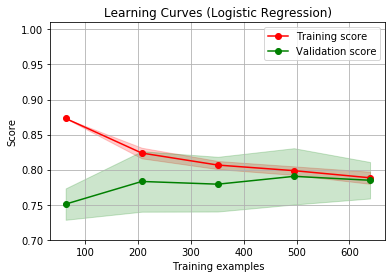

In [73]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

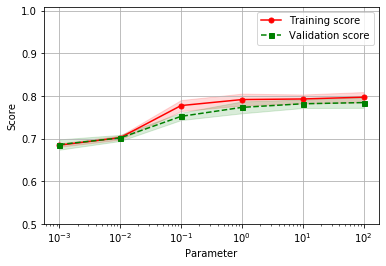

In [74]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);